In [41]:
import pandas as pd

#set seaborn color pallete
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma')
pal = sns.set_palette('plasma')

# This module displays Markdown and helps with visability within Juypter Notebooks
from IPython.display import Markdown, display, HTML

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    recall_score, plot_confusion_matrix)

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

#Import functions
import acquire as a
import prepare as p
import explore as e
import model as m 

# Acquire and Prepare

In [42]:
df, revert_key, replace_key = p.wrangle_data()
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


# Split Male/Female

In [43]:
males_df = df[df.sex == "Male"]
females_df = df[df.sex == "Female"]

In [44]:
#Make Dummies 
males_dummies = pd.get_dummies(males_df, drop_first = True)
females_dummies = pd.get_dummies(females_df, drop_first = True)

# Train, Validate, and Test Split

In [45]:
train_m, validate_m, test_m = p.train_validate_test_split(males_df, 'is_pes')

In [46]:
train_f, validate_f, test_f = p.train_validate_test_split(females_df, 'is_pes')

In [47]:
train_dummies_m, validate_dummies_m, test_dummies_m = p.train_validate_test_split(males_dummies, 'is_pes')

In [48]:
train_dummies_f, validate_dummies_f, test_dummies_f = p.train_validate_test_split(females_dummies, 'is_pes')

# Explore by Question 

## Most Important Issues Females by Question

In [49]:
# Generate object
obj_f = e.generate_and_return_obj(train_f)
# Examine the chi2 results and return the most signficant values from them
issues_female = obj_f.chi2_df.sort_values(by='p_val')
issues_female.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,84.582240,4.297342e-19,2,"[[20.48847926267281, 15.511520737327189], [91...."
happen_child_f2,60.152566,8.670341e-14,2,"[[46.2962962962963, 33.7037037037037], [67.708..."
happen_race,58.865096,1.650467e-13,2,"[[104.71889400921658, 79.28110599078342], [116..."
happen_pub_ed,53.248030,2.737394e-12,2,"[[23.903225806451612, 18.096774193548388], [13..."
job_benefits,55.415261,5.599109e-12,3,"[[96.18202764976958, 72.81797235023042], [56.3..."
job_security,55.028598,6.770388e-12,3,"[[90.49078341013825, 68.50921658986175], [114...."
elder_care,42.063426,7.345869e-10,2,"[[59.1889400921659, 44.8110599078341], [186.67..."
happen_health,40.303906,1.770590e-09,2,"[[149.110599078341, 112.88940092165899], [77.4..."
envir_50yrs,43.518288,1.910100e-09,3,"[[64.3110599078341, 48.6889400921659], [33.009..."
worry_government,45.153076,3.694997e-09,4,"[[99.59677419354838, 75.40322580645162], [4.55..."


<AxesSubplot:xlabel='p_val'>

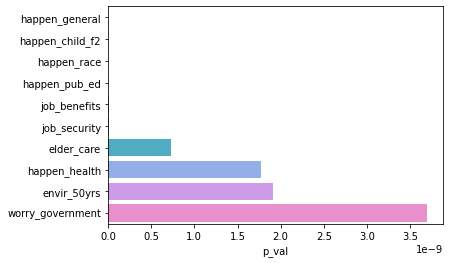

In [51]:
sns.barplot(y = issues_female[0:10].index, x = issues_female[0:10].p_val)

<AxesSubplot:xlabel='chi2'>

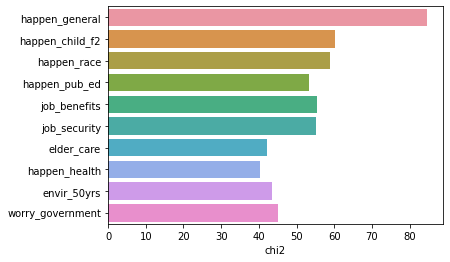

In [53]:
sns.barplot(y = issues_female[0:10].index, x = issues_female[0:10].chi2)

## Most Important Issues Males by Question

In [54]:
# Generate object
obj_m = e.generate_and_return_obj(train_m)
# Examine the chi2 results and return the most signficant values from them
issues_male = obj_m.chi2_df.sort_values(by='p_val').head(10)
issues_male.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,97.069095,8.350527e-22,2,"[[10.852272727272727, 9.147727272727273], [75...."
happen_pub_ed,53.154387,2.868611e-12,2,"[[12.480113636363637, 10.519886363636363], [10..."
happen_politics,49.322163,1.949074e-11,2,"[[10.852272727272727, 9.147727272727273], [59...."
happen_race,47.459004,4.947755e-11,2,"[[75.42329545454545, 63.57670454545455], [101...."
job_security,38.558751,4.237148e-09,2,"[[66.19886363636364, 55.80113636363637], [104...."
debt_30yrs,39.489327,1.367064e-08,3,"[[4.340909090909091, 3.659090909090909], [20.6..."
happen_wealthgap,34.767853,2.820049e-08,2,"[[10.309659090909092, 8.690340909090908], [33...."
happen_65up_f1,34.590975,3.080812e-08,2,"[[40.02040816326531, 33.97959183673469], [61.1..."
happen_usa,33.783649,4.612897e-08,2,"[[12.480113636363637, 10.519886363636363], [11..."
share_americans_in_middle_class,36.873429,4.894022e-08,3,"[[100.38352272727273, 84.61647727272727], [50...."


<AxesSubplot:xlabel='p_val'>

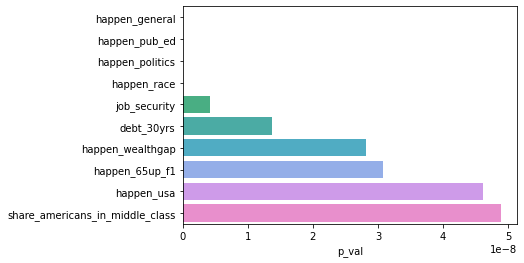

In [55]:
sns.barplot(y = issues_male[0:10].index, x = issues_male[0:10].p_val)

<AxesSubplot:xlabel='chi2'>

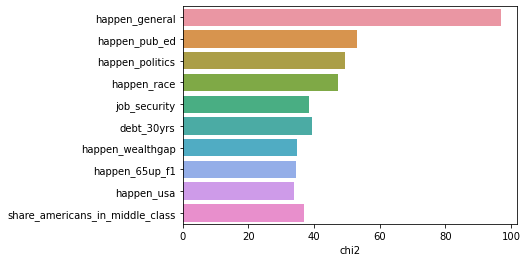

In [57]:
sns.barplot(y = issues_male[0:10].index, x = issues_male[0:10].chi2)

### Key Takeaways

The issues that were most critical for women (based on the chi-squared test) are: 
   - the general future of the United States, 
   - the future of children, 
   - the future of racial relations, 
   - the future of public education. 
   - job benefits, and 
   - job security. 

The issues most correlated with pessimism for men are:
 - What will happen generally to the future of the country. 
 - What will happend to the public education system. 
 - The future of politics. 
 - The future of race relations. 
 
There were more issues were more strongly correlated with pessismism for women than for men. In general, it appears that women and men are concerned with the same topics, but women just care about a wider range of topics. 

## Gender Differences by Question

In [68]:
important_for_females = issues_female[issues_female.p_val < 0.05]
important_for_males = issues_male[issues_male.p_val < 0.05]

In [69]:
important_for_females_list = important_for_females.index.to_list()
important_for_females_list

['happen_general',
 'happen_child_f2',
 'happen_race',
 'happen_pub_ed',
 'job_benefits',
 'job_security',
 'elder_care',
 'happen_health',
 'envir_50yrs',
 'worry_government',
 'worry_leaders',
 'happen_politics',
 'happen_usa',
 'happen_terroist',
 'share_americans_in_middle_class',
 'worry_public_schools',
 'happen_wealthgap',
 'happen_65up_f1',
 'worry_economy',
 'worry_morals',
 'fut_marriage',
 'ethnic_conflict',
 'happen_rel',
 'share_americans_in_lower_class',
 'happen_china',
 'happen_energy',
 'robot_replacement_increase_inequality',
 'debt_30yrs',
 'gov_in_wash',
 'major_corps',
 'happen_alzheimers',
 'automation_good_or_bad',
 'rel_groups',
 'happen_anti_semitism',
 'robot_replacement_means_better_jobs_for_humans',
 'pop_growth',
 'legal_immigration_levels',
 'priority_avoid_tax_increase',
 'military',
 'race_and_ethnicity',
 'evangelical_christian',
 'schools',
 'fut_abortion',
 'harass_personal_exp',
 'ethnic_customs',
 'fut_kids',
 'family_income_three_categories',
 'his

In [70]:
important_for_males_list = important_for_males.index.to_list()
important_for_males_list

['happen_general',
 'happen_pub_ed',
 'happen_politics',
 'happen_race',
 'job_security',
 'debt_30yrs',
 'happen_wealthgap',
 'happen_65up_f1',
 'happen_usa',
 'share_americans_in_middle_class']

In [71]:
len(important_for_females), len(important_for_males)

(48, 10)

In [72]:
important_for_females_but_not_males = set(important_for_females_list).difference(set(important_for_males_list))
important_for_females_but_not_males

{'automation_good_or_bad',
 'elder_care',
 'envir_50yrs',
 'ethnic_conflict',
 'ethnic_customs',
 'evangelical_christian',
 'family_income_three_categories',
 'fut_abortion',
 'fut_kids',
 'fut_marriage',
 'gov_in_wash',
 'happen_alzheimers',
 'happen_anti_semitism',
 'happen_child_f2',
 'happen_china',
 'happen_energy',
 'happen_health',
 'happen_rel',
 'happen_terroist',
 'harass_personal_exp',
 'hispanic_or_latino',
 'job_benefits',
 'legal_immigration_levels',
 'major_corps',
 'military',
 'pop_growth',
 'priority_avoid_tax_increase',
 'race_and_ethnicity',
 'rel_groups',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'schools',
 'share_americans_in_lower_class',
 'worry_economy',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_public_schools'}

In [63]:
important_for_males_but_not_females = set(important_for_males_list).difference(set(important_for_females_list))
important_for_males_but_not_females

set()

### Key Takeaways

There are 48 statistically significant topics for women, but only 10 for men. Women care about all the topics men care about, they just care about a wider range of topics. 

# Explore by Response

## Most Import Issues for Females by Reponse

In [79]:
# Generate object
obj_f = e.generate_and_return_obj(train_dummies_f)
# Examine the chi2 results and return the most signficant values from them
issues_female_responses = obj_f.chi2_df.sort_values(by='p_val')
issues_female_responses.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,263.867025,2.463885e-59,1,"[[168.46082949308754, 127.53917050691244], [78..."
avg_family_Get worse,103.524515,2.571920e-24,1,"[[128.05299539170508, 96.94700460829493], [118..."
happen_general_The U.S. economy will be WEAKER,78.071526,9.937617e-19,1,"[[112.11751152073732, 84.88248847926268], [134..."
happen_general_The U.S. economy will be STRONGER,74.006298,7.786820e-18,1,"[[155.3709677419355, 117.62903225806451], [91...."
attitude_Very pessimistic,70.366478,4.924975e-17,1,"[[219.11290322580646, 165.88709677419354], [27..."
happen_pub_ed_The public education system will GET WORSE,48.397465,3.480178e-12,1,"[[116.67050691244239, 88.32949308755761], [130..."
job_security_Less job security,46.012983,1.174719e-11,1,"[[132.60599078341014, 100.39400921658986], [11..."
happen_pub_ed_The public education system will IMPROVE,45.590718,1.457306e-11,1,"[[154.23271889400922, 116.76728110599079], [92..."
happen_race_Race relations will IMPROVE,44.632848,2.376705e-11,1,"[[130.89861751152074, 99.10138248847926], [116..."
attitude_Very optimistic,42.753478,6.209139e-11,1,"[[217.40552995391704, 164.59447004608296], [29..."


<AxesSubplot:xlabel='p_val'>

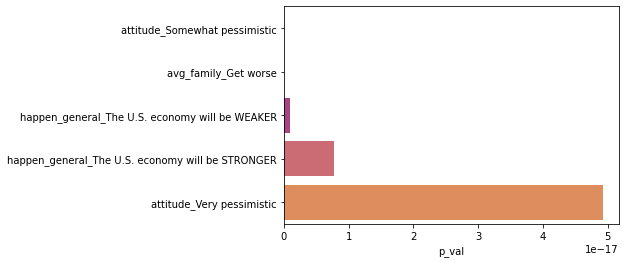

In [80]:
sns.barplot(y = issues_female_responses[0:5].index, x = issues_female_responses[0:5].p_val)

## Most Important Issues Males by Reponse

In [81]:
# Generate object
obj_m = e.generate_and_return_obj(train_dummies_m)
# Examine the chi2 results and return the most signficant values from them
issues_male_responses = obj_m.chi2_df.sort_values(by='p_val')
issues_male_responses.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,204.644586,2.024584e-46,1,"[[127.51420454545455, 107.48579545454545], [63..."
avg_family_Get worse,116.665604,3.397884e-27,1,"[[112.86363636363636, 95.13636363636364], [78...."
happen_general_The U.S. economy will be WEAKER,92.174165,7.937426e-22,1,"[[86.81818181818181, 73.18181818181819], [104...."
happen_general_The U.S. economy will be STRONGER,86.452819,1.431111e-20,1,"[[115.0340909090909, 96.9659090909091], [75.96..."
attitude_Very pessimistic,57.183218,3.970447e-14,1,"[[167.125, 140.875], [23.875, 20.125]]"
happen_pub_ed_The public education system will GET WORSE,51.323950,7.831433e-13,1,"[[90.07386363636364, 75.92613636363636], [100...."
happen_politics_The country will be MORE politically divided,47.106485,6.723286e-12,1,"[[70.53977272727273, 59.46022727272727], [120...."
happen_pub_ed_The public education system will IMPROVE,42.443417,7.275688e-11,1,"[[113.40625, 95.59375], [77.59375, 65.40625]]"
happen_politics_The country will be LESS politically divided,41.213619,1.364684e-10,1,"[[131.3125, 110.6875], [59.6875, 50.3125]]"
debt_30yrs_Grow larger,36.940729,1.217753e-09,1,"[[54.80397727272727, 46.19602272727273], [136...."


<AxesSubplot:xlabel='p_val'>

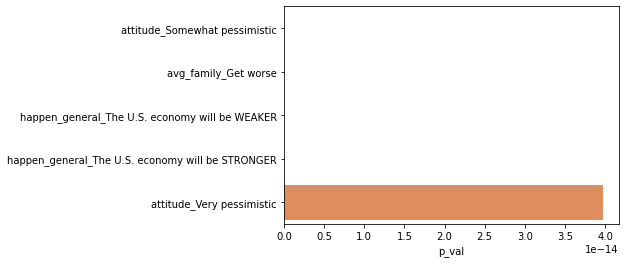

In [82]:
sns.barplot(y = issues_male_responses[0:5].index, x = issues_male_responses[0:5].p_val)

### Key Takeaways

The top five responses that most strongly predicted a pessimistic outlook are exactly the same for men and women. 

## Gender Differences by Response

In [83]:
important_for_females_responses = issues_female_responses[issues_female_responses.p_val < 0.05]
important_for_males_responses = issues_male_responses[issues_male_responses.p_val < 0.05]

In [84]:
important_for_females_responses_list = important_for_females_responses.index.to_list()
important_for_females_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'job_security_Less job security',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_race_Race relations will IMPROVE',
 'attitude_Very optimistic',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_government_Very worried',
 'worry_leaders_Very worried',
 'job_benefits_Not as good as they are now',
 'job_benefits_Better than they are now',
 'happen_politics_The country will be MORE politically divided',
 'happen_health_Health care will be MORE affordable',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_child_f2_Children will have a WORSE standard of living',
 'envir_50yrs_Worse than it is now',
 'happen_usa_The U.S. will be MORE important in the world',
 'env

In [85]:
important_for_males_responses_list = important_for_males_responses.index.to_list()
important_for_males_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'happen_politics_The country will be MORE politically divided',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_politics_The country will be LESS politically divided',
 'debt_30yrs_Grow larger',
 'happen_race_Race relations will IMPROVE',
 'job_security_Less job security',
 'attitude_Very optimistic',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_wealthgap_The gap between the rich and the poor will GET SMALLER',
 'happen_wealthgap_The gap between the rich and the poor will GROW',
 'happen_usa_The U.S. will be MORE important in the world',
 'share_americans_in_lower_class_Increase',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_economy_Not too worried',

In [86]:
important_for_females_but_not_males_responses = set(important_for_females_responses_list).difference(set(important_for_males_responses_list))
important_for_females_but_not_males_responses

{'age_50-64',
 'age_impact_A very bad thing',
 'ethnic_conflict_Not much of an impact',
 'ethnic_impact1_A very bad thing',
 'family_income_three_categories_<$30,000',
 'fut_abortion_Legal with no restrictions',
 'fut_marriage_Less likely to get married than people are now',
 'gov_in_wash_A very negative impact',
 'happen_alzheimers_Will probably happen',
 'happen_rel_Religion will be ABOUT AS important as it is now',
 'happen_rel_Religion will become LESS important',
 'harass_fired_f1_Not a problem',
 'harass_personal_exp_Yes',
 'hispanic_or_latino_Yes',
 'legal_immigration_levels_Maintained at current levels',
 'marital_status_Living with a partner',
 'military_A very negative impact',
 'priority_avoid_tax_increase_Should not be done',
 'priority_reduce_military_A top priority',
 'race_Black or African American',
 'race_and_ethnicity_Hispanic',
 'race_and_ethnicity_White non-Hispanic',
 'religion_Nothing in particular',
 'state_local_A very positive impact',
 'worry_climate_Very worr

In [87]:
important_for_males_but_not_females_responses = set(important_for_males_responses_list).difference(set(important_for_females_responses_list))
important_for_males_but_not_females_responses

{'age_impact_A somewhat good thing',
 'automation_good_or_bad_Mostly hurt American workers',
 'church_attendance_Never',
 'church_attendance_Once a week',
 'debt_30yrs_Be reduced',
 'ethnic_customs_Strengthen American customs and values',
 'family_income_nine_categories_Less than $10,000',
 'happen_70yr_labor_Will definitely not happen',
 'happen_alzheimers_Will definitely happen',
 'happen_anti_semitism_Will definitely not happen',
 'happen_anti_semitism_Will probably not happen',
 'happen_terroist_Will definitely not happen',
 'happen_terroist_Will probably happen',
 'highest_education_six_categories_Postgraduate',
 'inter_mar_A somewhat good thing',
 'pop_growth_Minor problem',
 'priority_reducing_spending_infrastructure_An important, but not a top priority',
 'registered_to_vote_You are NOT registered to vote at your current address',
 'rel_groups_A very positive impact',
 'replacement_by_robots_good_or_bad_A very bad thing for the country',
 'sci_tech_A somewhat positive impact',


### Key Takeaways

Different reponses weres stastically significant in predicting pessimism for females than males. 

Responses that were significant to women but not to men included topics such as ethnic conflict, abortion, religion, harassment, and general worries about the future. 

Respones that were significant to men but not to women were church attendance, terrorism, and science/technology. 

# Modeling by Gender

In [88]:
pd.set_option('display.max_colwidth', None)

## Female

In [89]:
females = e.generate_and_return_obj(females_df)
females.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
2041,201801133729,0.706203,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,605493,1.106863,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1956,201801124344,0.194872,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
221,317005,1.005385,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
719,201501623519,0.322398,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
print(f'Baseline Accuracy: {round((1 - females.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 56.9%


In [91]:
# Create a dataframe to store and compare our models' performances
score_df_female = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_female

,model_name,train_score,validate_score


In [92]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [93]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_female = m.test_a_model(females.X_train_dummies, females.y_train_dummies, females.X_validate_dummies, females.y_validate_dummies, model, name, score_df_female)

In [94]:
score_df_female.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
47,including_all_features_random_forest_min_samples_leaf_7_depth_7,0.775484,0.777778
1,including_all_features_random_forest_min_samples_leaf_3_depth_1,0.752258,0.774775
42,including_all_features_random_forest_min_samples_leaf_7_depth_2,0.851613,0.774775
30,including_all_features_random_forest_min_samples_leaf_6_depth_0,0.797419,0.771772
44,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.873548,0.771772
11,including_all_features_random_forest_min_samples_leaf_4_depth_1,0.775484,0.768769
60,including_all_features_random_forest_min_samples_leaf_9_depth_0,0.830968,0.768769
56,including_all_features_random_forest_min_samples_leaf_8_depth_6,0.762581,0.768769
33,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.860645,0.768769
13,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.816774,0.768769


### Feature Importance

In [95]:
#Make model
rf_depth_5_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=5)
#Fit Model
rf_depth_5_leaf_5.fit(females.X_train_dummies, females.y_train_dummies)

RandomForestClassifier(max_depth=5, min_samples_leaf=5)

In [96]:
#Create data frame of feature importances, using our selected model
feature_importances_females = pd.DataFrame(rf_depth_5_leaf_5.feature_importances_, index = females.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_females = feature_importances_females.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_females.columns.names = ['category']

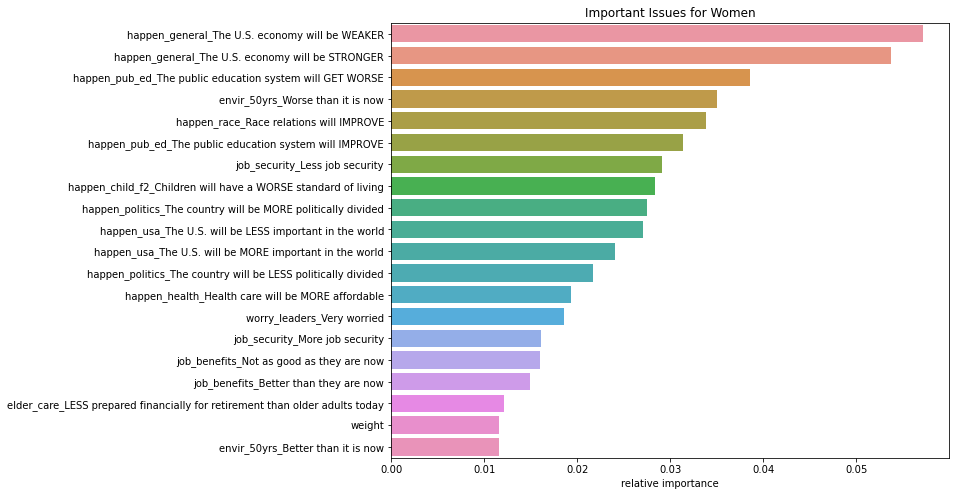

In [98]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_females = sns.barplot(x=feature_importances_females['relative importance'][0:20], y=feature_importances_females.index[0:20]).set(title="Important Issues for Women")

## Males

In [99]:
males = e.generate_and_return_obj(males_df)
males.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1986,201801127686,2.234676,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
75,169864,0.490990,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,201501618307,2.765590,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
224,319198,0.236477,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
605,201501192451,0.630844,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
print(f'Baseline Accuracy: {round(1.00 - males.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 54.36%


In [101]:
# Create a dataframe to store and compare our models' performances
score_df_male = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_male

,model_name,train_score,validate_score


In [102]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [103]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_male = m.test_a_model(males.X_train_dummies, males.y_train_dummies, males.X_validate_dummies, males.y_validate_dummies, model, name, score_df_male)

In [104]:
score_df_male.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
37,including_all_features_random_forest_min_samples_leaf_6_depth_7,0.795563,0.793358
21,including_all_features_random_forest_min_samples_leaf_5_depth_1,0.852615,0.785978
14,including_all_features_random_forest_min_samples_leaf_4_depth_4,0.887480,0.785978
41,including_all_features_random_forest_min_samples_leaf_7_depth_1,0.876387,0.782288
25,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.903328,0.782288
35,including_all_features_random_forest_min_samples_leaf_6_depth_5,0.900158,0.782288
8,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.947702,0.782288
49,including_all_features_random_forest_min_samples_leaf_7_depth_9,0.847861,0.782288
11,including_all_features_random_forest_min_samples_leaf_4_depth_1,0.816165,0.782288
7,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.942948,0.778598


### Feature Importance

In [105]:
#Make model
rf_depth_4_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=4)
#Fit Model
rf_depth_4_leaf_5.fit(males.X_train_dummies, males.y_train_dummies)

RandomForestClassifier(max_depth=4, min_samples_leaf=5)

In [106]:
#Create data frame of feature importances, using our selected model
feature_importances_males = pd.DataFrame(rf_depth_4_leaf_5.feature_importances_, index = males.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_males = feature_importances_males.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_males.columns.names = ['category']

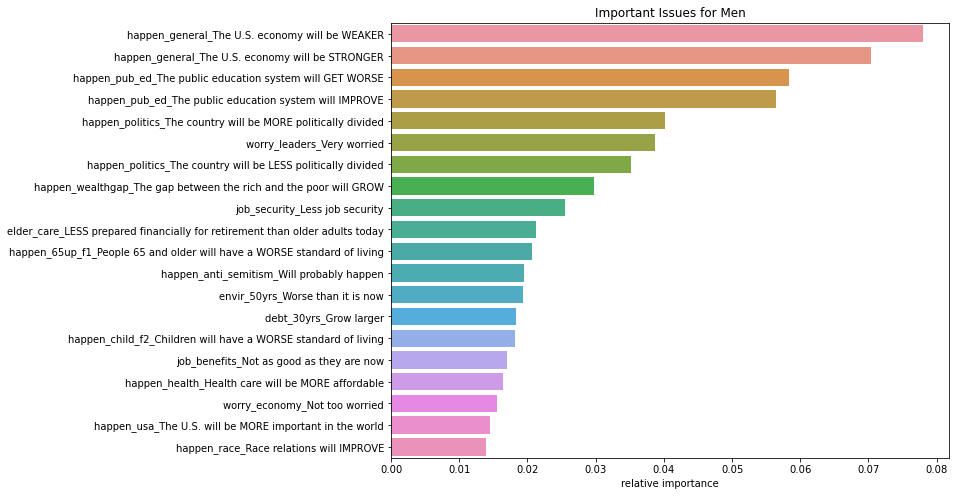

In [107]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_males = sns.barplot(x=feature_importances_males['relative importance'][0:20], y=feature_importances_males.index[0:20]).set(title="Important Issues for Men")

## Male/Female Side by Side Comparison

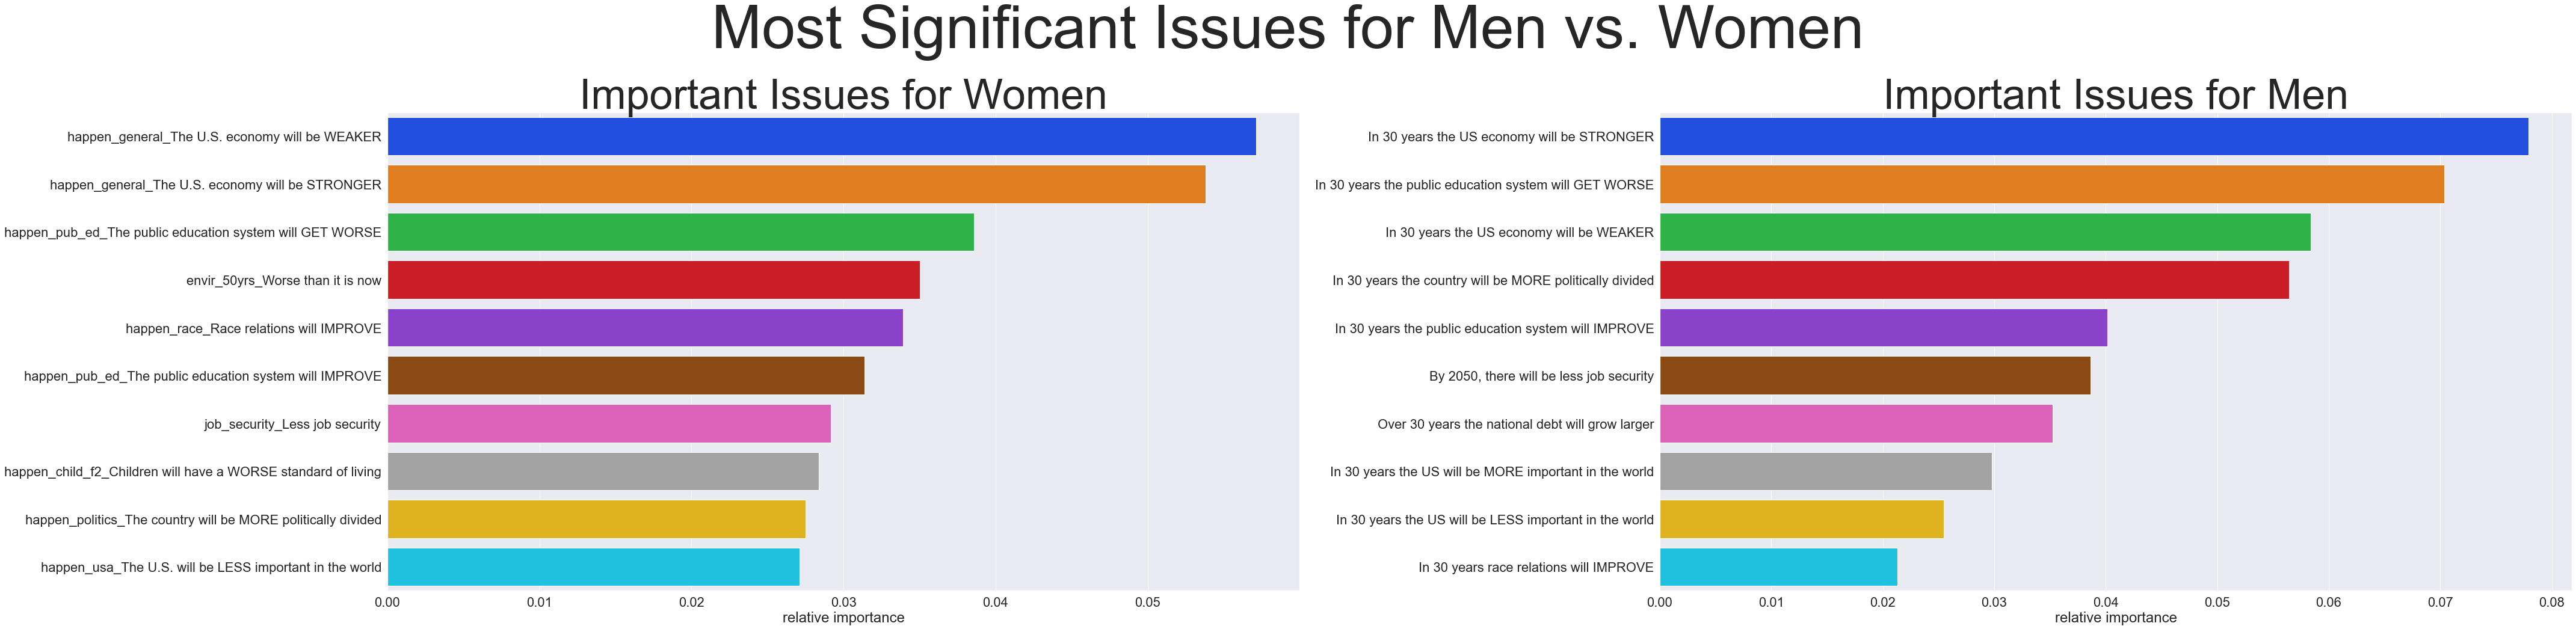

<Figure size 720x576 with 0 Axes>

In [114]:
sns.set(font_scale = 2)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=2, figsize = (60, 15))
fig.suptitle('Most Significant Issues for Men vs. Women', fontsize = 100)

#Create subplots
relative_importances_females = sns.barplot(x=feature_importances_females['relative importance'][0:10], y=feature_importances_females.index[0:10], ax = axs[0])
relative_importances_females.set_title("Important Issues for Women", fontsize = 70)


#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_males = sns.barplot(x=feature_importances_males['relative importance'][0:10], y=feature_importances_males.index[0:10], ax = axs[1])
relative_importances_males.set_title("Important Issues for Men", fontsize = 70)
relative_importances_males.set_yticklabels( ('In 30 years the US economy will be STRONGER', 
                                                 'In 30 years the public education system will GET WORSE',
                                                 'In 30 years the US economy will be WEAKER', 
                                                'In 30 years the country will be MORE politically divided', 
                                                'In 30 years the public education system will IMPROVE',
                                                'By 2050, there will be less job security',
                                                'Over 30 years the national debt will grow larger',
                                                'In 30 years the US will be MORE important in the world',
                                                'In 30 years the US will be LESS important in the world',
                                               'In 30 years race relations will IMPROVE') )


#Adjust formatting
fig.tight_layout()

### Key Takeaway

There is significant overlap in the most important issues for men and the most important issues for women. Both gender place large significant on the economy and the education system. Race relations and job security are also important issues for both genders. 

Men are slightly more pessismistic than women on average. 

# Republican / Democrat Split

In [132]:
republican_dataframe = df[df.summary_of_political_party_data == ' Rep/Lean Rep']

In [133]:
democrats_dataframe = df[df.summary_of_political_party_data == "Dem/Lean Dem"]

In [134]:
#Make Dummies 
republicans_dummies = pd.get_dummies(republican_dataframe , drop_first = True)
democrats_dummies = pd.get_dummies(democrats_dataframe, drop_first = True)

# Train, Validate, Test Split

In [135]:
train_r, validate_r, test_r = p.train_validate_test_split(republican_dataframe, 'is_pes')

In [136]:
train_d, validate_d, test_d = p.train_validate_test_split(democrats_dataframe, 'is_pes')

In [137]:
train_r_dummies, validate_r_dummies, test_r_dummies = p.train_validate_test_split(republicans_dummies, 'is_pes')

In [138]:
train_d_dummies, validate_d_dummies, test_d_dummies = p.train_validate_test_split(democrats_dummies, 'is_pes')

# Explore by Question

## Republican Importance by Question

In [139]:
# Generate object
obj_r = e.generate_and_return_obj(train_r)
# Examine the chi2 results and return the most signficant values from them
issues_republicans = obj_r.chi2_df.sort_values(by='p_val')
issues_republicans.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,89.032197,4.644126e-20,2,"[[11.99074074074074, 9.00925925925926], [87.36111111111111, 65.63888888888889], [85.64814814814815, 64.35185185185185]]"
happen_pub_ed,61.656802,4.086914e-14,2,"[[15.987654320987655, 12.012345679012345], [104.49074074074075, 78.50925925925925], [64.52160493827161, 48.47839506172839]]"
happen_child_f2,52.212427,4.594260e-12,2,"[[39.903614457831324, 32.096385542168676], [47.10843373493976, 37.89156626506024], [4.9879518072289155, 4.0120481927710845]]"
happen_race,52.205487,4.610229e-12,2,"[[74.22839506172839, 55.77160493827161], [94.78395061728395, 71.21604938271605], [15.987654320987655, 12.012345679012345]]"
happen_usa,43.700822,3.239567e-10,2,"[[14.274691358024691, 10.725308641975309], [94.21296296296296, 70.78703703703704], [76.51234567901234, 57.48765432098765]]"
happen_health,41.761143,8.544427e-10,2,"[[101.6358024691358, 76.3641975308642], [70.23148148148148, 52.76851851851852], [13.132716049382717, 9.867283950617283]]"
debt_30yrs,41.105837,6.209789e-09,3,"[[2.2839506172839505, 1.7160493827160495], [30.262345679012345, 22.737654320987655], [111.91358024691358, 84.08641975308642], [40.54012345679013, 30.459876543209877]]"
happen_politics,35.369083,2.087859e-08,2,"[[11.419753086419753, 8.580246913580247], [47.96296296296296, 36.03703703703704], [125.61728395061728, 94.38271604938272]]"
worry_morals,40.602561,3.248416e-08,4,"[[59.382716049382715, 44.617283950617285], [5.138888888888889, 3.861111111111111], [21.69753086419753, 16.30246913580247], [0.5709876543209876, 0.42901234567901236], [98.20987654320987, 73.79012345679013]]"
worry_government,37.168319,4.239107e-08,3,"[[73.6574074074074, 55.342592592592595], [3.425925925925926, 2.574074074074074], [22.839506172839506, 17.160493827160494], [85.07716049382717, 63.92283950617284]]"


## Democrat Explore by Question

In [140]:
# Generate object
obj_d = e.generate_and_return_obj(train_d)
# Examine the chi2 results and return the most signficant values from them
issues_democrats = obj_d.chi2_df.sort_values(by='p_val')
issues_democrats.head(10)

,chi2,p_val,deg_free,expected_freq
happen_pub_ed,101.242246,1.036396e-22,2,"[[19.61320754716981, 16.38679245283019], [114.41037735849056, 95.58962264150944], [96.97641509433963, 81.02358490566037]]"
happen_general,91.107389,1.645439e-20,2,"[[17.97877358490566, 15.02122641509434], [81.72169811320755, 68.27830188679245], [131.2995283018868, 109.7004716981132]]"
job_security,64.968128,5.095389e-14,3,"[[78.99764150943396, 66.00235849056604], [114.95518867924528, 96.04481132075472], [33.778301886792455, 28.221698113207548], [3.268867924528302, 2.731132075471698]]"
happen_child_f2,53.912035,1.964041e-12,2,"[[44.37735849056604, 39.62264150943396], [60.22641509433962, 53.77358490566038], [7.39622641509434, 6.60377358490566]]"
happen_politics,52.770391,3.475804e-12,2,"[[17.433962264150942, 14.566037735849056], [69.19103773584905, 57.80896226415094], [144.375, 120.625]]"
job_benefits,52.023583,2.960617e-11,3,"[[84.99056603773585, 71.00943396226415], [53.39150943396226, 44.60849056603774], [89.89386792452831, 75.10613207547169], [2.724056603773585, 2.275943396226415]]"
happen_health,45.097735,1.611207e-10,2,"[[125.30660377358491, 104.69339622641509], [86.08018867924528, 71.91981132075472], [19.61320754716981, 16.38679245283019]]"
envir_50yrs,48.196756,1.933758e-10,3,"[[32.1438679245283, 26.8561320754717], [33.23349056603774, 27.766509433962263], [0.5448113207547169, 0.455188679245283], [165.07783018867926, 137.92216981132074]]"
happen_energy,49.577578,4.423812e-10,4,"[[0.5448113207547169, 0.455188679245283], [63.742924528301884, 53.257075471698116], [3.268867924528302, 2.731132075471698], [108.41745283018868, 90.58254716981132], [55.02594339622642, 45.97405660377358]]"
happen_race,42.030385,7.468234e-10,2,"[[89.34905660377359, 74.65094339622641], [119.85849056603773, 100.14150943396227], [21.79245283018868, 18.20754716981132]]"


### Key Takeways

There is significant overlap in the most important issues for Republicans and Democrats. 

# Explore by Response

## Republican Explore by Response

In [141]:
# Generate object
obj_r = e.generate_and_return_obj(train_r_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_republicans = obj_r.chi2_df.sort_values(by='p_val')
issues_republicans.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,191.935319,1.201998e-43,1,"[[127.33024691358025, 95.66975308641975], [57.66975308641975, 43.33024691358025]]"
avg_family_Get worse,82.486800,1.063782e-19,1,"[[113.05555555555556, 84.94444444444444], [71.94444444444444, 54.05555555555556]]"
happen_general_The U.S. economy will be WEAKER,81.684383,1.596501e-19,1,"[[99.35185185185185, 74.64814814814815], [85.64814814814815, 64.35185185185185]]"
happen_general_The U.S. economy will be STRONGER,81.450106,1.797426e-19,1,"[[97.63888888888889, 73.36111111111111], [87.36111111111111, 65.63888888888889]]"
happen_pub_ed_The public education system will IMPROVE,56.728452,5.003437e-14,1,"[[120.47839506172839, 90.52160493827161], [64.52160493827161, 48.47839506172839]]"
attitude_Very pessimistic,54.685152,1.414711e-13,1,"[[163.30246913580248, 122.69753086419753], [21.69753086419753, 16.30246913580247]]"
happen_pub_ed_The public education system will GET WORSE,52.459832,4.391391e-13,1,"[[80.50925925925925, 60.49074074074074], [104.49074074074075, 78.50925925925925]]"
happen_race_Race relations will IMPROVE,41.584617,1.128779e-10,1,"[[90.21604938271605, 67.78395061728395], [94.78395061728395, 71.21604938271605]]"
happen_usa_The U.S. will be LESS important in the world,41.564586,1.140405e-10,1,"[[90.78703703703704, 68.21296296296296], [94.21296296296296, 70.78703703703704]]"
debt_30yrs_Grow larger,39.619955,3.085147e-10,1,"[[73.08641975308642, 54.91358024691358], [111.91358024691358, 84.08641975308642]]"


## Democrat Explore by Response

In [142]:
# Generate object
obj_d = e.generate_and_return_obj(train_d_dummies)
# Examine the chi2 results and return the most signficant values from them
issues_democrats = obj_d.chi2_df.sort_values(by='p_val')
issues_democrats.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,244.251131,4.653741e-55,1,"[[155.27122641509433, 129.72877358490567], [75.72877358490567, 63.27122641509434]]"
happen_pub_ed_The public education system will GET WORSE,98.607022,3.079253e-23,1,"[[116.58962264150944, 97.41037735849056], [114.41037735849056, 95.58962264150944]]"
avg_family_Get worse,94.204325,2.845783e-22,1,"[[128.0306603773585, 106.96933962264151], [102.96933962264151, 86.03066037735849]]"
happen_general_The U.S. economy will be STRONGER,83.410687,6.666064e-20,1,"[[149.27830188679246, 124.72169811320755], [81.72169811320755, 68.27830188679245]]"
happen_general_The U.S. economy will be WEAKER,81.317152,1.922508e-19,1,"[[99.7004716981132, 83.2995283018868], [131.2995283018868, 109.7004716981132]]"
happen_pub_ed_The public education system will IMPROVE,77.402221,1.394583e-18,1,"[[134.02358490566039, 111.97641509433963], [96.97641509433963, 81.02358490566037]]"
attitude_Very pessimistic,71.568795,2.677578e-17,1,"[[201.58018867924528, 168.41981132075472], [29.419811320754718, 24.580188679245282]]"
job_security_Less job security,56.256941,6.359294e-14,1,"[[116.04481132075472, 96.95518867924528], [114.95518867924528, 96.04481132075472]]"
happen_politics_The country will be MORE politically divided,49.353018,2.138053e-12,1,"[[86.625, 72.375], [144.375, 120.625]]"
envir_50yrs_Worse than it is now,46.501274,9.155890e-12,1,"[[65.92216981132076, 55.07783018867924], [165.07783018867926, 137.92216981132074]]"


### Key Takeaway

There is overlap, but the most important issue for Republicans seems to be the economy, whereas the most important issues for Democrats seems to be the public education system. 

# Modeling

## Republican

In [143]:
republicans = e.generate_and_return_obj(republican_dataframe)
republicans.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1795,201801105856,1.338218,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,201501652886,1.182982,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2210,201801150341,1.076449,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1447,201801057730,1.931583,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
86,184778,0.313910,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [144]:
print(f'Baseline Accuracy: {round(1.00 - republicans.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 57.34%


In [145]:
# Create a dataframe to store and compare our models' performances
score_df_republican = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_republican

,model_name,train_score,validate_score


In [146]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [147]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_republican = m.test_a_model(republicans.X_train_dummies, republicans.y_train_dummies, republicans.X_validate_dummies, republicans.y_validate_dummies, model, name, score_df_republican)

In [148]:
score_df_republican.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
14,including_all_features_random_forest_min_samples_leaf_4_depth_4,0.884283,0.791165
44,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.875648,0.787149
25,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.892919,0.787149
34,including_all_features_random_forest_min_samples_leaf_6_depth_4,0.891192,0.787149
16,including_all_features_random_forest_min_samples_leaf_4_depth_6,0.917098,0.787149
15,including_all_features_random_forest_min_samples_leaf_4_depth_5,0.892919,0.787149
62,including_all_features_random_forest_min_samples_leaf_9_depth_2,0.856649,0.787149
22,including_all_features_random_forest_min_samples_leaf_5_depth_2,0.849741,0.783133
32,including_all_features_random_forest_min_samples_leaf_6_depth_2,0.863558,0.783133
12,including_all_features_random_forest_min_samples_leaf_4_depth_2,0.832470,0.783133


### Feature Engineering

In [149]:
#Make model
rf_depth_7_leaf_4 = RandomForestClassifier(min_samples_leaf=4, max_depth=7)
#Fit Model
rf_depth_7_leaf_4.fit(republicans.X_train_dummies, republicans.y_train_dummies)

RandomForestClassifier(max_depth=7, min_samples_leaf=4)

In [152]:
#Create data frame of feature importances, using our selected model
feature_importances_republicans = pd.DataFrame(rf_depth_7_leaf_4.feature_importances_, index = republicans.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_republicans = feature_importances_republicans.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_republicans.columns.names = ['category']

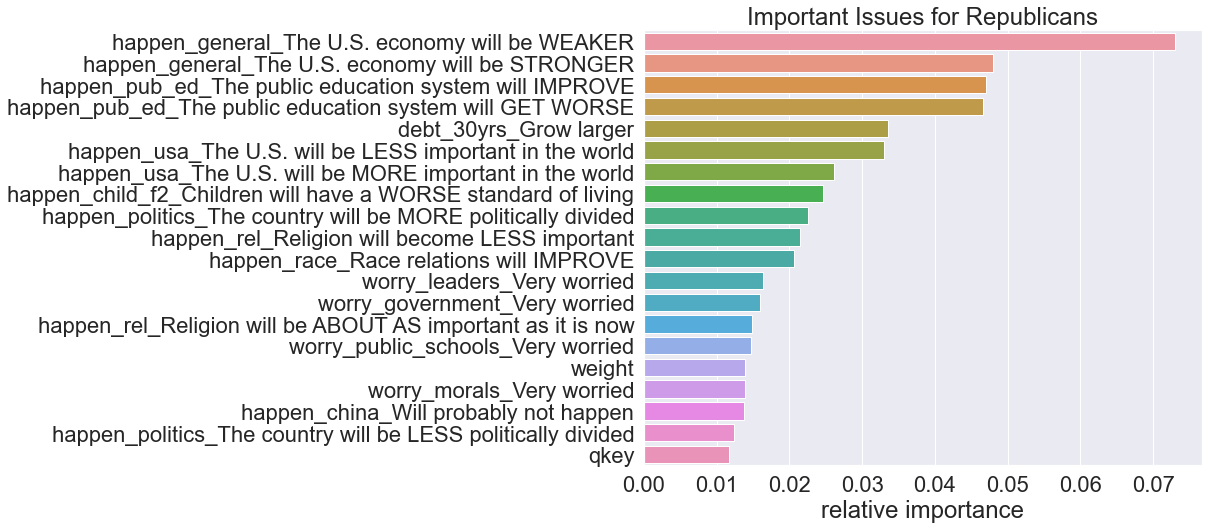

In [153]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_republicans = sns.barplot(x=feature_importances_republicans['relative importance'][0:20], y=feature_importances_republicans.index[0:20]).set(title="Important Issues for Republicans")

## Democratic

In [154]:
democrats = e.generate_and_return_obj(democrats_dataframe)
democrats.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
42,140165,0.648885,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2415,201801175380,1.962519,0,1,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1403,201801050789,1.204143,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2511,201801188088,0.836139,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
955,201701614857,0.562429,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [155]:
print(f'Baseline Accuracy: {round(1.00 - democrats.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 54.49%


In [156]:
# Create a dataframe to store and compare our models' performances
score_df_democrat = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_democrat

,model_name,train_score,validate_score


In [157]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [158]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_democrat = m.test_a_model(democrats.X_train_dummies, democrats.y_train_dummies, democrats.X_validate_dummies, democrats.y_validate_dummies, model, name, score_df_democrat)

In [159]:
score_df_democrat.sort_values(by = 'validate_score', ascending = False).head()

,model_name,train_score,validate_score
7,including_all_features_random_forest_min_samples_leaf_3_depth_7,0.923483,0.800613
8,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.940633,0.797546
49,including_all_features_random_forest_min_samples_leaf_7_depth_9,0.815303,0.797546
3,including_all_features_random_forest_min_samples_leaf_3_depth_3,0.816623,0.794479
30,including_all_features_random_forest_min_samples_leaf_6_depth_0,0.821900,0.794479


### Feature Engineering 

In [160]:
#Make model
rf_depth_6_leaf_7 = RandomForestClassifier(min_samples_leaf=7, max_depth=6)
#Fit Model
rf_depth_6_leaf_7.fit(democrats.X_train_dummies, democrats.y_train_dummies)

RandomForestClassifier(max_depth=6, min_samples_leaf=7)

In [161]:
#Create data frame of feature importances, using our selected model
feature_importances_democrats = pd.DataFrame(rf_depth_6_leaf_7.feature_importances_, index = democrats.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances_democrats = feature_importances_democrats.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances_democrats.columns.names = ['category']

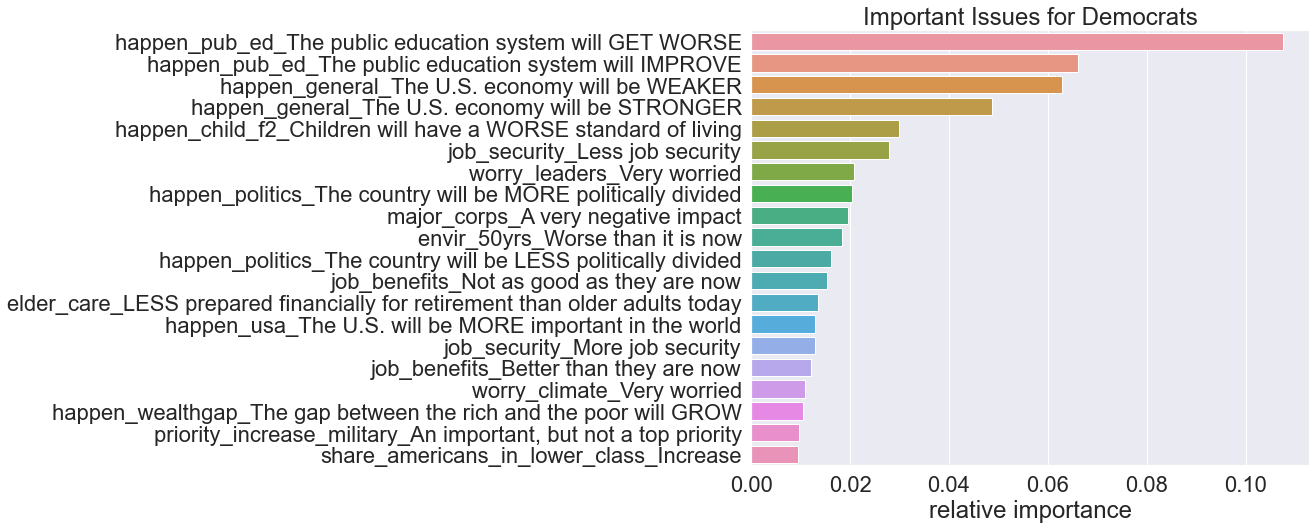

In [162]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
relative_importances_democrats = sns.barplot(x=feature_importances_democrats['relative importance'][0:20], y=feature_importances_democrats.index[0:20]).set(title="Important Issues for Democrats")

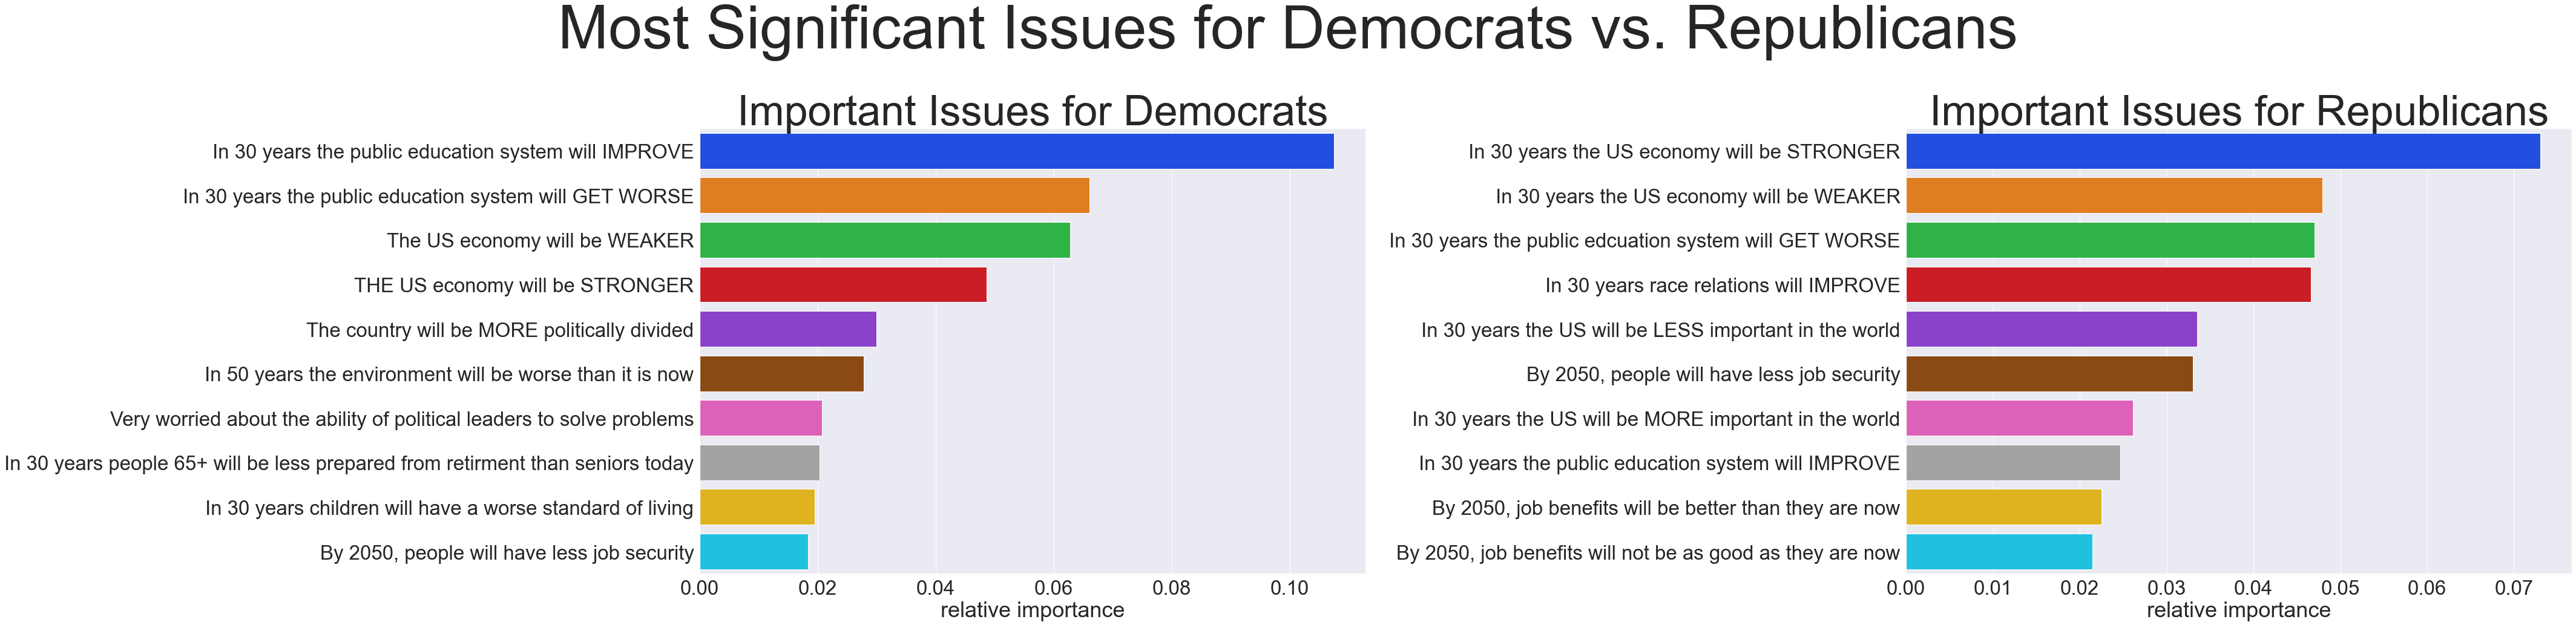

<Figure size 720x576 with 0 Axes>

In [165]:
sns.set(font_scale = 3)
sns.set_palette("bright")

fig, axs = plt.subplots(ncols=2, figsize = (60, 15))
fig.suptitle('Most Significant Issues for Democrats vs. Republicans', fontsize = 100)

#Create subplots

relative_importances_democrats = sns.barplot(x=feature_importances_democrats['relative importance'][0:10], y=feature_importances_democrats.index[0:10], ax = axs[0])
relative_importances_democrats.set_title("Important Issues for Democrats", fontsize = 70)
relative_importances_democrats.set_yticklabels( ('In 30 years the public education system will IMPROVE', 
                                                 'In 30 years the public education system will GET WORSE',
                                                 'The US economy will be WEAKER', 
                                                'THE US economy will be STRONGER', 
                                                'The country will be MORE politically divided', 
                                                'In 50 years the environment will be worse than it is now',
                                                'Very worried about the ability of political leaders to solve problems',
                                                'In 30 years people 65+ will be less prepared from retirment than seniors today',
                                                'In 30 years children will have a worse standard of living',
                                                'By 2050, people will have less job security') )

#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances_republicans = sns.barplot(x=feature_importances_republicans['relative importance'][0:10], y=feature_importances_republicans.index[0:10], ax = axs[1])
relative_importances_republicans.set_title("Important Issues for Republicans", fontsize = 70)
relative_importances_republicans.set_yticklabels( ('In 30 years the US economy will be STRONGER', 
                                                 'In 30 years the US economy will be WEAKER',
                                                 'In 30 years the public edcuation system will GET WORSE', 
                                                'In 30 years race relations will IMPROVE', 
                                                   'In 30 years the US will be LESS important in the world',
                                                'By 2050, people will have less job security', 
                                                'In 30 years the US will be MORE important in the world',
                                                'In 30 years the public education system will IMPROVE',
                                                'By 2050, job benefits will be better than they are now',
                                                'By 2050, job benefits will not be as good as they are now') )

#Adjust formatting
fig.tight_layout()

### Key Takeaways

Again, the main difference seems to be that Democrats place top priority on education, whereas Republicans place top priority on the economy.

Democrats are slighlty more pessimistic than Republicans on average.